In [1]:
import numpy as  # IMPORTAR LAS LIBRERIAS NECESARIAS
from time import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# ESTA RUTINA FUE TOMADA DE UNA FUENTE EXTERNA EN STACKOVERFLOW

def next_permutation(seq, pred=cmp): # RUTINA PARA GENERAR LAS PERMUTACIONES CON REPETICION 
    """Like C++ std::next_permutation() but implemented as
    generator. Yields copies of seq."""
    def reverse(seq, start, end):
        # seq = seq[:start] + reversed(seq[start:end]) + \
        #       seq[end:]
        end -= 1
        if end <= start:
            return
        while True:
            seq[start], seq[end] = seq[end], seq[start]
            if start == end or start+1 == end:
                return
            start += 1
            end -= 1
    if not seq:
        raise StopIteration
    try:
        seq[0]
    except TypeError:
        raise TypeError("seq must allow random access.")
    first = 0
    last = len(seq)
    seq = seq[:]
    # Yield input sequence as the STL version is often
    # used inside do {} while.
    yield seq[:]
    if last == 1:
        raise StopIteration
    while True:
        next = last - 1
        while True:
            # Step 1.
            next1 = next
            next -= 1
            if pred(seq[next], seq[next1]) < 0:
                # Step 2.
                mid = last - 1
                while not (pred(seq[next], seq[mid]) < 0):
                    mid -= 1
                seq[next], seq[mid] = seq[mid], seq[next]
                # Step 3.
                reverse(seq, next1, last)
                # Change to yield references to get rid of
                # (at worst) |seq|! copy operations.
                yield seq[:]
                break
            if next == first:
                raise StopIteration
    raise StopIteration

In [3]:
# GENERADOR DE MICROESTADOS RED N=L*L


def Energias(L): # ESTA FUNCION SOLO DEPENDE DEL TAMANO DEL LADO DE LA RED
    Energias=[]
    N=L*L #NUMERO DE SPINES EN RED
    for i in range(0,N+1): # CREA LAS PERMUTACIONES CON REPETICION DE ESTADOS ARRIBA Y ABAJO
        print str(i)+" Espines abajo"
        microestados=list(next_permutation([-1]*i+[1]*(N-i)))
        c=0
        for i in microestados:
            microestados[c]=np.reshape(i,(L,L)) # GENERA LOS ARREGLOS EN FORMA DE MATRICES CUADRADAS
            c+=1
        for micro in microestados: # ESTA RUTINA CALCULA LA ENERGIA DE CADA MICROESTADO
            Energia=0
            for i in range(L): # SE RECORREN LOS ARREGLOS
                for j in range(L):
                    arriba=i-1
                    abajo=i+1
                    der=j+1
                    izq=j-1
                    if arriba<0: # CON ESTAS CONDICIONES SE IMPLEMENTAN LAS CONDICIONES DE FRONTERA PERIODICAS
                        arriba=-1
                    if abajo>L-1:
                        abajo=0
                    if der>L-1:
                        der=0
                    if izq<0:
                        izq=-1
                    Energia=Energia-micro[i][j]*micro[arriba][j]-micro[i][j]*micro[abajo][j]-micro[i][j]*micro[i][der]-micro[i][j]*micro[i][izq]
            Energia=Energia/2 # LA FUNCION ANTERIOR CUENTA DOS VECES CADA INTERACCION
            Energias.append(Energia)
    return Energias # ESTA FUNCION DEVUELVE UN VECTOR CON LAS ENERGIAS CORRESPONDIENTES A CADA MICROESTADO

# ESTA FUNCION CALCULA LA DENSIDAD DE ESTADOS
                        
def DensidadEstado(Energias):
    EnergiasSR=[]
    Omega=[]
    for i in Energias: # CUENTA EL NUMERO DE DIFERENTES ENERGIAS
        if i not in EnergiasSR:
            EnergiasSR.append(i)
    for j in EnergiasSR: # CUENTA EL NUMERO DE VECES QUE SE REPITE CADA ENERGIA PARA CALCULAR OMEGA
        c=0
        for k in Energias:
            if k==j:
                c+=1
        Omega.append(c)
    Densidad=[]
    for m in range(len(EnergiasSR)):
        Densidad.append([EnergiasSR[m],Omega[m]])
    return Densidad # DEVUELVE UNA FUNCION CON EL PRIMER VALOR SIENDO LA ENERGIA Y EL SEGUNDO 
# EL NUNERO DE MICROESTADOS QUE POSEEN ESE VALOR 


In [4]:
# MALLA 2*2

t0=time()
E22=Energias(2)
Resultado22=DensidadEstado(E22)
t1=time()

#ESCRIBE LOS  RESULTADOS DEL TIEMPO DE COMPUTO Y DENSIDAD DE ESTADOS EN UN VECTOR
f = open('Energias22.txt','w')
f.write(str(Resultado22))
f.write("\n"+str(t1-t0))
f.close()

0 Espines abajo
1 Espines abajo
2 Espines abajo
3 Espines abajo
4 Espines abajo


In [5]:
# MALLA 3*3

t0=time()
E33=Energias(3)
Resultado33=DensidadEstado(E33)
t1=time()

f = open('Energias33.txt','w')
f.write(str(Resultado33))
f.write("\n"+str(t1-t0))
f.close()


0 Espines abajo
1 Espines abajo
2 Espines abajo
3 Espines abajo
4 Espines abajo
5 Espines abajo
6 Espines abajo
7 Espines abajo
8 Espines abajo
9 Espines abajo


In [6]:
# MALLA 4*4

t0=time()
E44=Energias(4)
Resultado44=DensidadEstado(E44)
t1=time()

f = open('Energias44.txt','w')
f.write(str(Resultado44))
f.write("\n"+str(t1-t0))
f.close()

0 Espines abajo
1 Espines abajo
2 Espines abajo
3 Espines abajo
4 Espines abajo
5 Espines abajo
6 Espines abajo
7 Espines abajo
8 Espines abajo
9 Espines abajo
10 Espines abajo
11 Espines abajo
12 Espines abajo
13 Espines abajo
14 Espines abajo
15 Espines abajo
16 Espines abajo


In [13]:
# MALLA 5*5

t0=time()
E55=Energias(5)
Resultado55=DensidadEstado(E55)
t1=time()

f = open('Energias55.txt','w')
f.write(str(Resultado55))
f.write("\n"+str(t1-t0))
f.close()

0 Espines abajo
1 Espines abajo
2 Espines abajo
3 Espines abajo
4 Espines abajo
5 Espines abajo
6 Espines abajo
7 Espines abajo
8 Espines abajo
9 Espines abajo
10 Espines abajo
11 Espines abajo
12 Espines abajo
13 Espines abajo
14 Espines abajo
15 Espines abajo
16 Espines abajo
17 Espines abajo
18 Espines abajo
19 Espines abajo
20 Espines abajo
21 Espines abajo
22 Espines abajo
23 Espines abajo
24 Espines abajo
25 Espines abajo


In [31]:
archivo=open("Energias44.txt","r")
datos=archivo.readlines()
densidad=datos[1]

In [32]:
densidad

'3.50356388092'

In [10]:

def Zeta(T,Densidad): #CALCULA LA FUNCION DE PARTICION

    zet=0
    for j in Densidad:
        zet+=j[1]*np.exp(-1.0*j[0]/T)
    return zet

def prome_ene(T,Densidad #CALCULA EL PROMEDIO DE LA ENERGIA
    e=0
    for j in Densidad:
        e+=j[0]*j[1]*np.exp(-1.0*j[0]/i)
    return e/Zeta(T,Densidad)
def prome_ene2(T,Densidad): #CALCULA EL CUADRADO DEL PROMEDIO DE LA ENERGIA 
    e2=0
    for j in Densidad:
        e2+=j[0]*j[0]*j[1]*np.exp(-1.0*j[0]/i)
    return e2/Zeta(T,Densidad)

In [139]:
#CALOR ESPECIFICO PARA EL SISTEMA 2*2
T=np.linspace(0.1,10,200)
e22=np.array([prome_ene2(i,Resultado22) for i in T ])
e2=np.array([prome_ene(i,Resultado22) for i in T ])
cv2=(e22-e2*e2)/T/T/4
#3*3
T=np.linspace(0.1,10,200)
e23=np.array([prome_ene2(i,Resultado33) for i in T ])
e3=np.array([prome_ene(i,Resultado33) for i in T ])
cv3=(e23-e3*e3)/T/T/9
#4*4
T=np.linspace(0.1,10,200)
e24=np.array([prome_ene2(i,Resultado44) for i in T ])
e4=np.array([prome_ene(i,Resultado44) for i in T ])
cv4=(e24-e4*e4)/T/T/16
#5*5
T=np.linspace(0.1,10,200)
e25=np.array([prome_ene2(i,Resultado55) for i in T ])
e5=np.array([prome_ene(i,Resultado55) for i in T ])
cv5=(e25-e5*e5)/T/T/25

Tcexacta=2.269185

Tcerca=T[37:50]

Cvexacto=((2**3)/(np.pi*Tcexacta*Tcexacta))*(-1*np.log(np.abs(1-Tcerca/Tcexacta))+np.log(Tcexacta/2)-(1+np.pi/4))
Tcerca


array([ 1.94070352,  1.99045226,  2.04020101,  2.08994975,  2.13969849,
        2.18944724,  2.23919598,  2.28894472,  2.33869347,  2.38844221,
        2.43819095,  2.4879397 ,  2.53768844])

[]

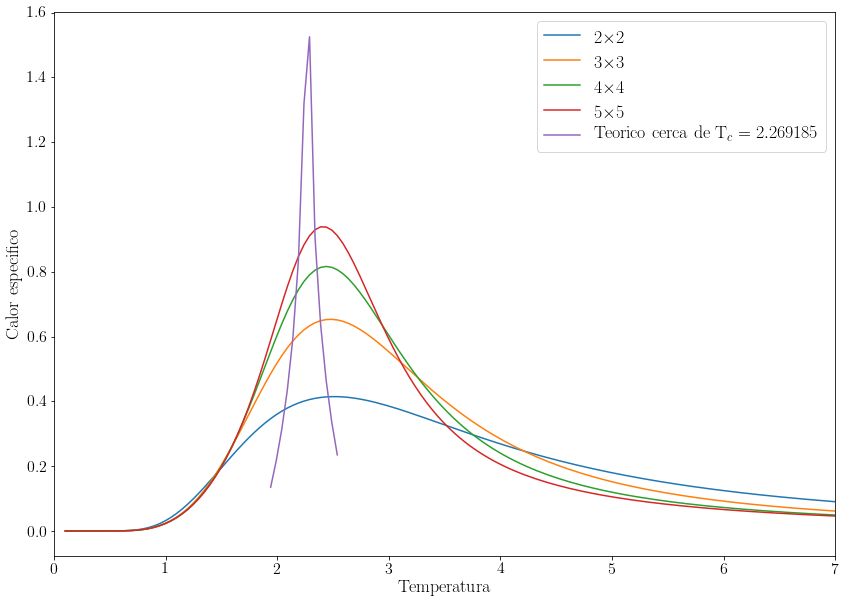

In [140]:
# CURVAS DE CALOR ESPECIFICO VERSUS TEMPERATURA



plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['figure.figsize'] = [14, 10]
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
plt.xlabel("Temperatura",fontsize=18)
plt.ylabel("Calor especifico",fontsize=18)
plt.plot(T,cv2,label=r"2\times2")
plt.plot(T,cv3,label=r"3\times3")
plt.plot(T,cv4,label=r"4\times4")
plt.plot(T,cv5,label=r"5\times5")
plt.plot(Tcerca,Cvexacto,label=r"Teorico cerca de T_c=2.269185")
xlim(0,7)
plt.legend(fontsize=18)
plt.plot()

In [141]:
# OBTIENE LA TEMPERATURA DE CURIE
TC=[]
#2*2
indice=cv2.argmax(axis=0)
tc=T[indice]
TC.append(tc)
#3*3
indice=cv3.argmax(axis=0)
tc=T[indice]
TC.append(tc)
#4*4
indice=cv4.argmax(axis=0)
tc=T[indice]
TC.append(tc)
#5*5
indice=cv5.argmax(axis=0)
tc=T[indice]
TC.append(tc)


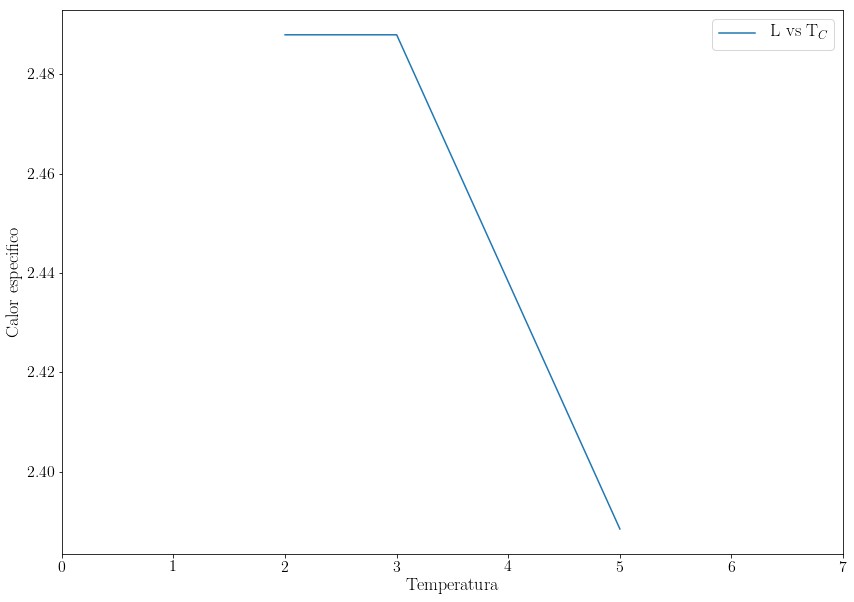

In [144]:
# GRAFICA TEMPERATURA DE CURIE VS TAMAÑO DEL SISTEMA
L=[2,3,4,5]
matplotlib.rcParams['figure.figsize'] = [14, 10]
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
plt.xlabel("Temperatura",fontsize=18)
plt.ylabel("Calor especifico",fontsize=18)
plt.plot(L,TC,label=r"L vs T_C")
xlim(0,7)
plt.legend(fontsize=18)



In [145]:
# ESTIMA TIEMPO COMPUTACIONAL


array([  0.1       ,   0.14974874,   0.19949749,   0.24924623,
         0.29899497,   0.34874372,   0.39849246,   0.44824121,
         0.49798995,   0.54773869,   0.59748744,   0.64723618,
         0.69698492,   0.74673367,   0.79648241,   0.84623116,
         0.8959799 ,   0.94572864,   0.99547739,   1.04522613,
         1.09497487,   1.14472362,   1.19447236,   1.24422111,
         1.29396985,   1.34371859,   1.39346734,   1.44321608,
         1.49296482,   1.54271357,   1.59246231,   1.64221106,
         1.6919598 ,   1.74170854,   1.79145729,   1.84120603,
         1.89095477,   1.94070352,   1.99045226,   2.04020101,
         2.08994975,   2.13969849,   2.18944724,   2.23919598,
         2.28894472,   2.33869347,   2.38844221,   2.43819095,
         2.4879397 ,   2.53768844,   2.58743719,   2.63718593,
         2.68693467,   2.73668342,   2.78643216,   2.8361809 ,
         2.88592965,   2.93567839,   2.98542714,   3.03517588,
         3.08492462,   3.13467337,   3.18442211,   3.23

In [85]:
np.abs(-2)

2